In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from glob import glob
import numpy as np
from math import sqrt
from __future__ import unicode_literals
from IPython.core.display import display, HTML

In [5]:
# Global configurations
# ---------------------

# Expand the notebook to the width of the browser
display(HTML("<style>.container { width:100% !important; }</style>"))

# Matplotlib style
plt.style.use('seaborn-colorblind')

# Use LaTeX and its body font for the diagrams' text.
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.unicode'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif']  = ['Nimbus Roman Becker No9L']

# Font sizes
SIZE = 36
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE-2)  # legend fontsize
plt.rc('figure', titlesize=SIZE)  # # size of the figure title

# Use thinner lines for axes to avoid distractions.
mpl.rcParams['axes.linewidth']    = 1
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['lines.linewidth'] = 2


# Do not use a box for the legend to avoid distractions.
mpl.rcParams['legend.frameon'] = False

# Restore part of matplotlib 1.5 behavior
mpl.rcParams['patch.force_edgecolor'] = True
mpl.rcParams['errorbar.capsize'] = 3

# Helpers
# -------

# Use coordinated colors. These are the "Tableau 20" colors as 
# RGB. Each pair is strong/light. For a theory of color    
tableau20 = [(31 , 119, 180), (174, 199, 232), # blue        [ 0,1 ]
             (255, 127, 14 ), (255, 187, 120), # orange      [ 2,3 ]
             (44 , 160, 44 ), (152, 223, 138), # green       [ 4,5 ]
             (214, 39 , 40 ), (255, 152, 150), # red         [ 6,7 ]
             (148, 103, 189), (197, 176, 213), # purple      [ 8,9 ]
             (140, 86 , 75 ), (196, 156, 148), # brown       [10,11]
             (227, 119, 194), (247, 182, 210), # pink        [12,13]
             (188, 189, 34 ), (219, 219, 141), # yellow      [14,15]
             (23 , 190, 207), (158, 218, 229), # cyan        [16,17]
             (65 , 68 , 81 ), (96 , 99 , 106), # gray        [18,19]
             (127, 127, 127), (143, 135, 130), # gray        [20,21] 
             (165, 172, 175), (199, 199, 199), # gray        [22,23]
             (207, 207, 207)]                   # gray        [24]
  
# Scale the RGB values to the [0, 1] range, which is the format 
# matplotlib accepts.    
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)    

# Return a single plot without right and top axes
def fig_setup(x=16,y=6):
    fig = plt.figure(figsize=(x,y))
    ax = fig.add_subplot(111)  
#     ax.spines["top"].set_visible(False)  
#     ax.spines["right"].set_visible(False)  
#     ax.get_xaxis().tick_bottom()  
#     ax.get_yaxis().tick_left()
    
    return fig, ax

In [13]:
# Single files

def extract_data(lines,fs='local'):
    if fs=='local':
        ip_durs = list()
        exec_durs = list()
        op_durs = list()
        l = 0
        while l < len(lines):
            ip_durs.append(float(lines[l+1].split(',')[0]) - float(lines[l].split(',')[0]))
            exec_durs.append(float(lines[l+3].split(',')[0]) - float(lines[l+2].split(',')[0]))
            op_durs.append(float(lines[l+5].split(',')[0]) - float(lines[l+4].split(',')[0]))
            l+=6
    #     print durs
        return np.mean(ip_durs), np.std(ip_durs)/sqrt(30), np.mean(exec_durs), np.std(exec_durs)/sqrt(30), np.mean(op_durs), np.std(op_durs)/sqrt(30)
    else:
        durs = list()
        l = 0
        while l < len(lines):
            durs.append(float(lines[l+1].split(',')[0]) - float(lines[l].split(',')[0]))
            l+=2
    #     print durs
        return np.mean(durs), np.std(durs)/sqrt(30)
    
fs = ['local_fs_in_exec_out','shared_fs_exec']
df_local = pd.DataFrame(columns=['data input staging','exec','data output staging'])
df_local_err = pd.DataFrame(columns=['data input staging','exec','data output staging'])
df_shared = pd.DataFrame(columns=['exec'])
df_shared_err = pd.DataFrame(columns=['exec'])
data = ['1m','10m','100m','1g']

for f in fs:
    if f in ['shared_fs_exec']:
        for d in data:
            fname = '../raw_data/single_files/{2}_zeros/data_{0}_{1}.prof'.format(d,''.join(f.split('_')[:2]), f)
            lines = open(fname,'r').readlines()
            xt = extract_data(lines, fs='shared')
            df_shared.loc[d] = [xt[0]]
            df_shared_err.loc[d] = [xt[1]]
    else:
        ip_dur = list()
        ip_err = list()
        exec_dur = list()
        exec_err = list()
        op_dur = list()
        op_err = list()
        for d in data:
            fname = '../raw_data/single_files/{2}/data_{0}_{1}.prof'.format(d,''.join(f.split('_')[:2]), f)
            lines = open(fname,'r').readlines()
            xt = extract_data(lines)
            df_local.loc[d] = [xt[0],xt[2],xt[4]]
            df_local_err.loc[d] = [xt[1],xt[3],xt[5]]
            
            
print df_shared
print df_local

              exec
1m    1.689080e+04
10m   1.194131e+05
100m  1.209881e+06
1g    8.766388e+06
      data input staging          exec  data output staging
1m          7.425633e+03  6.352633e+03         2.477827e+04
10m         1.598733e+04  1.883237e+04         1.374298e+05
100m        7.612403e+04  1.543743e+05         1.229588e+06
1g          1.159966e+06  1.708647e+06         8.769810e+06


[u'exec', u'data input staging', u'exec', u'data output staging'] [u'exec', u'data input staging', u'exec', u'data output staging']


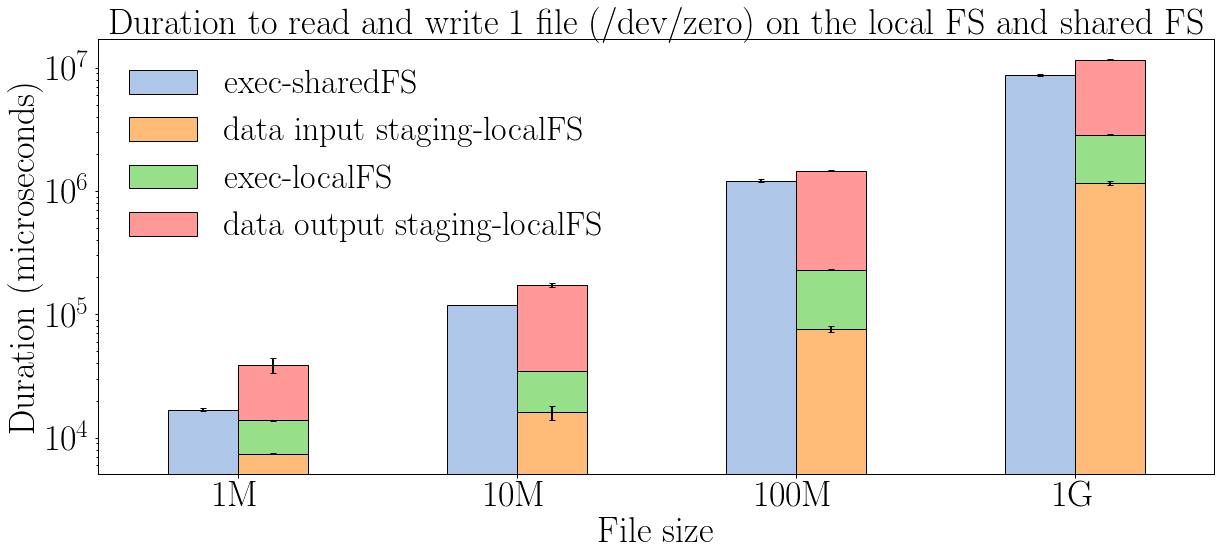

In [14]:
fig, ax = fig_setup(20,8)
ax1 = df_shared.plot(ax=ax,yerr=df_shared_err, kind='bar', color=tableau20[1],use_index=True, width=0.25, position=1, rot=0)
ax2 = df_local.plot(ax=ax, yerr=df_local_err, kind='bar', color=[tableau20[3],tableau20[5],tableau20[7]], stacked=True, width=0.25, position=0, rot=0)

ax.set_title('Duration to read and write 1 file (/dev/zero) on the local FS and shared FS')
ax.set_ylabel('Duration (microseconds)')
ax.set_xlabel('File size')
ax.set_yscale('log',basey=10)
plt.gca().set_xlim([-0.5,3.5])
ticks = df_shared.index.values.tolist()
xticks = list()
for t in ticks:
    xticks += [t.upper()]

ax.set_xticklabels(xticks)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
labels = [l1[0] + '-sharedFS']
labels.extend([str(x)+'-localFS' for x in l1[1:]])
handles = h1 + h2
ax.legend(handles,labels)
print l1, l2

* Command executed: ```dd if=/dev/zero of=output.dat  bs=<file_size>  count=1```
* exec-shared fs: Data is directly read from the shared FS and written to shared FS
* -localFS: Data is staged from the shared to local FS (orange), Exec kernel reads from localFS and writes to localFS (green), Data is staged from localFS to sharedFS(red)

In [8]:
# Single files

def extract_data(lines,fs='local'):
    if fs=='local':
        exec_durs = list()
        op_durs = list()
        l = 0
        while l < len(lines):
            exec_durs.append(float(lines[l+1].split(',')[0]) - float(lines[l].split(',')[0]))
            op_durs.append(float(lines[l+3].split(',')[0]) - float(lines[l+2].split(',')[0]))
            l+=4
    #     print durs
        return np.mean(exec_durs), np.std(exec_durs)/sqrt(30), np.mean(op_durs), np.std(op_durs)/sqrt(30)
    else:
        durs = list()
        l = 0
        while l < len(lines):
            durs.append(float(lines[l+1].split(',')[0]) - float(lines[l].split(',')[0]))
            l+=2
    #     print durs
        return np.mean(durs), np.std(durs)/sqrt(30)
    
fs = ['local_fs_exec_out','shared_fs_exec']
df_local = pd.DataFrame(columns=['exec','data output staging'])
df_local_err = pd.DataFrame(columns=['exec','data output staging'])
df_shared = pd.DataFrame(columns=['exec'])
df_shared_err = pd.DataFrame(columns=['exec'])
data = ['1m','10m','100m','1g']

for f in fs:
    if f in ['shared_fs_exec']:
        for d in data:
            fname = '../raw_data/single_files/{2}/data_{0}_{1}.prof'.format(d.upper(),''.join(f.split('_')[:2]), f)
            lines = open(fname,'r').readlines()
            xt = extract_data(lines, fs='shared')
            df_shared.loc[d] = [xt[0]]
            df_shared_err.loc[d] = [xt[1]]
    else:
        for d in data:
            fname = '../raw_data/single_files/{2}/data_{0}_{1}.prof'.format(d.upper(),''.join(f.split('_')[:2]), f)
            lines = open(fname,'r').readlines()
            xt = extract_data(lines)
            df_local.loc[d] = [xt[0],xt[2]]
            df_local_err.loc[d] = [xt[1],xt[3]]

In [9]:
print df_local
print df_shared

               exec  data output staging
1m      4437.666667         1.700520e+04
10m    18773.000000         1.244149e+05
100m  108478.166667         1.224686e+06
1g    836262.500000         7.152323e+06
              exec
1m    1.922507e+04
10m   1.200903e+05
100m  1.161268e+06
1g    9.413372e+06


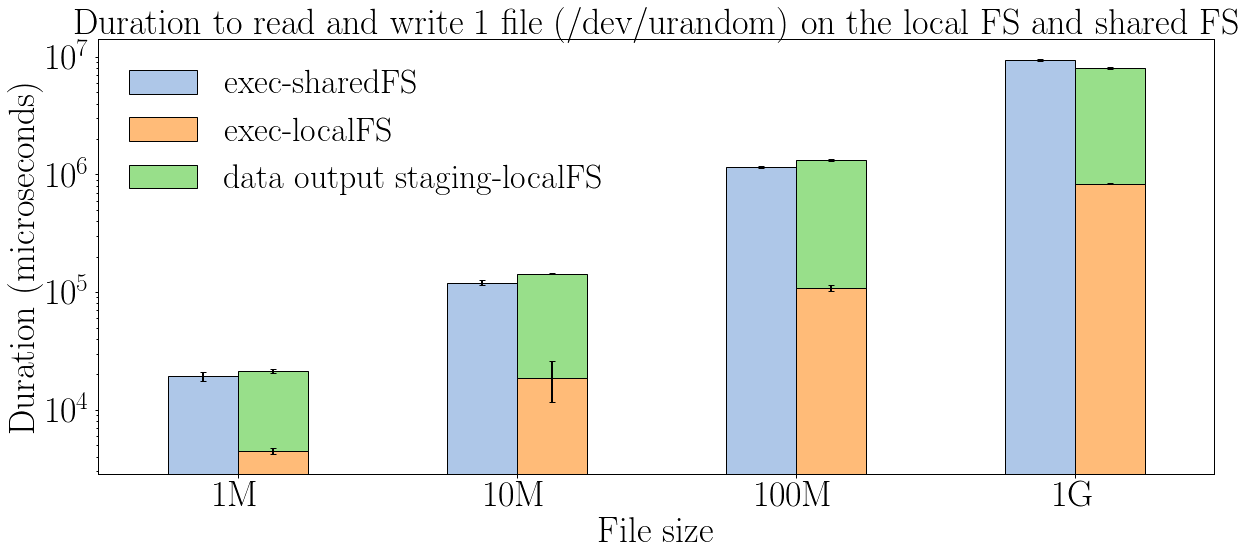

In [12]:
fig, ax = fig_setup(20,8)
ax1 = df_shared.plot(ax=ax,yerr=df_shared_err, kind='bar', color=tableau20[1],use_index=True, width=0.25, position=1, rot=0)
ax2 = df_local.plot(ax=ax, yerr=df_local_err, kind='bar', color=[tableau20[3],tableau20[5]], stacked=True, width=0.25, position=0, rot=0)

ax.set_title('Duration to read and write 1 file (/dev/urandom) on the local FS and shared FS')
ax.set_ylabel('Duration (microseconds)')
ax.set_xlabel('File size')
ax.set_yscale('log',basey=10)
plt.gca().set_xlim([-0.5,3.5])
ticks = df_shared.index.values.tolist()
xticks = list()
for t in ticks:
    xticks += [t.upper()]

ax.set_xticklabels(xticks)
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
labels = [l1[0] + '-sharedFS']
labels.extend([str(x)+'-localFS' for x in l1[1:]])
handles = h1 + h2
ax.legend(handles,labels)

* Command executed: ```dd if=/dev/urandom of=output.dat  bs=<file_size>  count=1```
* exec-shared fs: Data is directly read from the shared FS and written to shared FS (blue)
* -localFS: Exec kernel reads from sharedFS and writes to localFS (orange), Data is staged from localFS to sharedFS(green)